# K-Means (K-Ortalamalar)

K-means bir unsupervised learning modelidir. Amaç gözlemleri birbirlerine olan benzerliklerine göre kümelere ayırmaktır. 

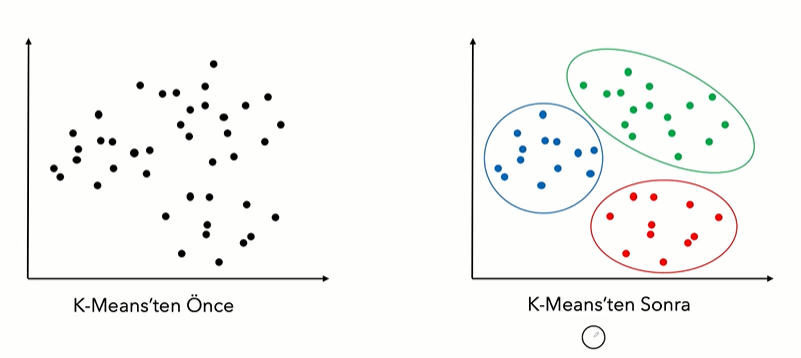

Sol grafikteki bazı gözlemler birbirlerine olan yakınlıklarına göre çeşitli uzaklık metrikleri kullanılarak sağdaki grafikteki gibi kümelere ayrılmış. K-Means'teki temel amacımız gözlem birimlerini kümelere ayırmaktır. 

K-Means algoritmasının uygulanma adımları:

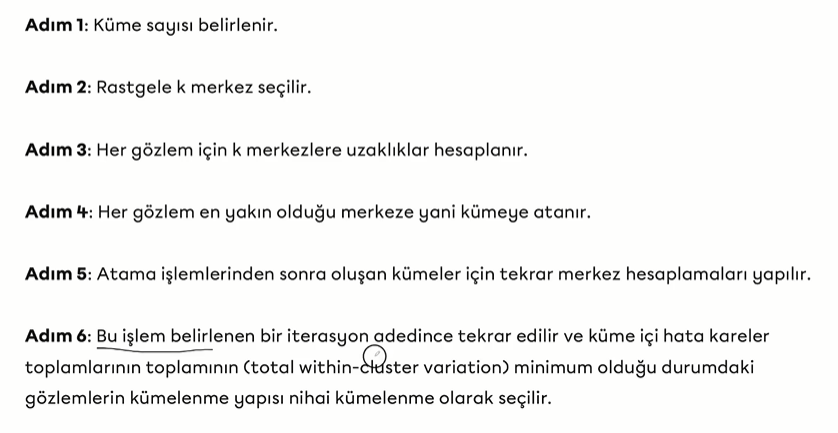

Bir kümede bir merkez olduğunu düşünelim. Merkezdeki gözlem biriminin değerleri ile etrafındaki diğer gözlem birimlerinin değerlerinin farklarının karelerini alıp topladığımızda, bu kümenin kendi içindeki hata karesini buluruz. 

K-Means algoritmasındaki problemimiz: buradaki merkezleri nasıl belirleyeceğiz? Küme içi birbirine benzerlik çok olmalı, homojen olmalı, kümeler arası heterojen olmalı. 

Merkezdeki gözlem birimi ile diğer gözlem birimleri arasındaki değişkenlerdeki değerlerin farkların karelerinin toplamını her bir küme için alırsak, her küme için hata kareler toplamını (SSE) hesaplamış oluruz. Bu SSE'leri toplarsak toplam hata kareler değeri elimizde olur. O zaman kümelerdeki merkezler uygunsa ve olası en uygun merkezlere gidebildiysek bu durumda SSE en düşük olur. Eğer küçük olmazsa, merkezleri değiştirmeye devam ederiz. SSE değerinin en küçük olduğu durumdaki merkezler, gerçek merkezler olarak kabul ederiz. 

Özetle amacımız kümeler içindeki homojenliği çok yüksek yapmak (benzerlik demek, farklarının küçük olması demek).

## K-Means Uygulama

In [39]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

warnings.simplefilter(action='ignore', category=Warning)

Kullanacak olduğumuz veri setinde (Clustering/segmentasyon problemi) amacımız amerikadaki eyaletleri veri setindeki suç istatistiklerine göre gruplara (clusterlara) ayırmak. Amacımız bu eyaletleri segmentlere ayırmak.

### K-Means

In [40]:
df = pd.read_csv("../datasets/USArrests.csv", index_col=0) # 0. indexte index bilgisi olduğundan dolayı index_col=0 dedik

In [41]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [42]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


Uzaklık temelli bir yöntem (K-Means) kullanacağız. Uzaklık temelli ve gradient descent yöntemlerin kullanımındaki süreçlerde değişkenlerin standartlaştırılması önem arz etmektedir. Dolayısıyla buradaki değişkenleri de standartlaştırmamız gerekmektedir.

In [45]:
sc = MinMaxScaler()

In [46]:
df = sc.fit_transform(df)

In [47]:
df[0:5]

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512]])

Standartlaştırma işlemimizi tamamladık. Fakat burada veriler fit_transform işleminden çıktıktan sonra numpy array'ine dönüştü. Dolayısıyla pandas metodları kullanamıyoruz (df.head()).

Şimdi modelimizi kurabiliriz. Buradaki modelimiz bir gözetimsiz öğrenme olduğundan dolayı herhangi bir bağımlı değişkenimiz bulunmuyor. Dolayısıyla sadece bağımsız değişkenleri modele vereceğiz.

In [48]:
kmeans = KMeans(n_clusters=4, random_state=17)

In [49]:
kmeans.fit(df)

KMeans(n_clusters=4, random_state=17)

## Dikkat!!!!
Burada conda base environment içerisinde numpy'ın versiyonu 1.22.3 olduğundan dolayı kmeans algoritması çalışmıyor. Bundan dolayı yeni bir environment oluşturup adına *for_clust* dedim. Burada gerekli kütüphaneleri kurdum, **numpy'ın da 1.21.4 versiyonu var. Bu versiyonda çalışıyor k_means.** Jupyter'i de bu ortamda çalıştırdım anaconda navigator'den. 

----------------

In [50]:
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'random_state': 17,
 'tol': 0.0001,
 'verbose': 0}

Yukarıda, KMeans algoritmasının parametreleri gösterilmiştir. n_clusters, dışarıdan belirlenmesi gereken önemli bir hiperparametredir, yani bizim ayarlamamız gereken bir değerdir. 

Yukarıdaki işlemler sonucunda clusterlarmızın (kümelerimizin) merkezlerini gözlemleyebiliriz. 

In [51]:
kmeans.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

Gözlem birimlerimizin hangi kümelere eklendiğini görmek için;

In [52]:
kmeans.labels_

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 2, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

Belirlediğimiz gibi 4 tane küme oluşmuş, 0 ilk kümeyi 3 son kümeyi ifade ediyor. Dolayısıyla bunlar, veri setindeki her bir gözlemin, K-Means tarafından belirlenen kümeleridir.

In [53]:
kmeans.inertia_

3.6834561535859134

Burada inertia, bize modelimizin SSE (SSD - sum of distances) değerini vermektedir. 

Yukarıda belirlediğimiz 4 sayısı bu senaryo için optimum bir değer mi? Bunun için en optimum küme sayısını belirlemek amacıyla SSE değerlerini hesaplayacağımız bir döngü kullanacağız.

### Optimum Küme Sayısının Belirlenmesi

Buradaki amacımız, en düşük SSE (SSD, SSR) değerini veren küme sayısını belirlemek.

In [86]:
kmeans = KMeans(random_state=17)
ssd = [] # sum of squared distances

In [87]:
K = range(1, 30) # cluster parametremizin 1den 30a kadar değer alabilmesi için liste

In [88]:
for k in K: # K içerisindeki değerlerden tek tek yeni modeller oluşturup fit edilecek ve ssd değeri hesaplanıp ssd listesine eklenecek
    kmeans = KMeans(n_clusters=k, random_state=17).fit(df)
    ssd.append(kmeans.inertia_)

Modelimizin n_clusters parametresini yani oluşturmak istediğimiz sınıf sayısını sıraysıyla 1'den 30'a kadar değer vererek denedik ve her modelin SSD değerini hesaplayıp SSD listesi içerisine kaydettik. Bunu gözlemlemek amacıyla bir grafik çizdireceğiz.

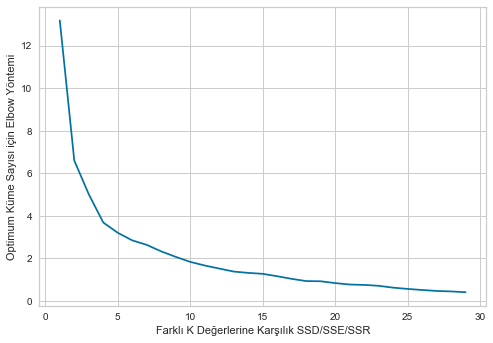

In [89]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık SSD/SSE/SSR")
plt.ylabel("Optimum Küme Sayısı için Elbow Yöntemi")
plt.show()

Bu yöntemi optimum noktaya kesin olarak karar verme için kullanmak yerine, sadece bir fikir edinme açısından kullanıyoruz. Çünkü burada cluster sayısının artmasıyla SSD değerinin de zaten düşmesini bekliyoruz. Yukarıda en düşük hatayı veren nokta 29 gibi gözüküyor fakat veri seti içerisinde zaten 40 tane gözlem var. Bu gözlemleri 28-29 tane ayrı sınıfta kümelemek hatalı olacaktır. Yukarıdaki grafikte en büyük yön değişikliğinin olduğu noktayı optimum nokta olarak belirleyebiliriz gibi gözüküyor. Bu yönteme *elbow yöntemi* denir.

Elbow yönteminde optimum noktayı biz kendimiz yorumlayarak veriyoruz. Bir de bütün ssd değerlerinden grafik oluşturup en optimum noktayı da seçen bir yöntem bulunuyor.

In [78]:
kmeans = KMeans(random_state=17)

In [79]:
elbow = KElbowVisualizer(kmeans, k=(2, 20))

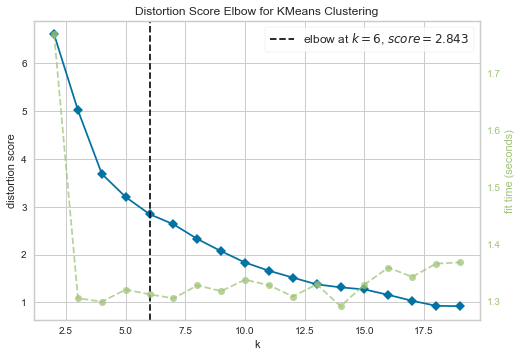

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [80]:
elbow.fit(df)
elbow.show()

**Not:** elbow.fit() metodunu kendi başına kullanınca hata veriyor. Bu metodun ardından elbow.show() metodunu da kullanmamız gerek.

Yukarıdaki grafikte en optimum noktayı model bize 6 olarak seçmiş. Bu seçilen değere erişmek istersek;

In [91]:
elbow.elbow_value_

6

### Final Model

In [92]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df)

In [93]:
kmeans.cluster_centers_

array([[0.64371773, 0.78424658, 0.77966102, 0.54374308],
       [0.11325301, 0.0859589 , 0.3220339 , 0.09328165],
       [0.23493976, 0.33317025, 0.84503632, 0.22997416],
       [0.83562823, 0.70645793, 0.37772397, 0.37172388],
       [0.5686747 , 0.70205479, 0.71864407, 0.87028424],
       [0.36230637, 0.31409002, 0.54237288, 0.33554817]])

In [95]:
kmeans.labels_

array([3, 4, 0, 5, 4, 4, 2, 2, 0, 3, 2, 1, 0, 5, 1, 5, 5, 3, 1, 0, 2, 4,
       1, 3, 5, 5, 5, 4, 1, 2, 0, 0, 3, 1, 5, 5, 5, 5, 2, 3, 1, 3, 0, 2,
       1, 5, 5, 1, 1, 5])

Burada cluster işlemini hallettik fakat bunları ana df içerisinde hangi gözlem birimi hangi sınıf içerisinde vs bunları göremiyoruz. Dolayısıyla öncelikle bu işlemi halletmemiz gerekiyor. Bunun için sınıflandırmaları bir değişken içerisinde tutalım.

In [96]:
clusters = kmeans.labels_

dataframe'imiz array tipinde olduğundan dolayı df'i tekrar tanıtıp, bu df içerisine yukarıdaki sınıf bilgilerini bulunduran bir değişken ekleyeceğiz.

In [98]:
df = pd.read_csv("../datasets/USArrests.csv", index_col=0)

In [99]:
df["cluster"] = clusters

In [100]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,4
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,5
California,9.0,276,91,40.6,4


Eğer değişken içirisinde 0 değerini görmek istemiyorsak clusterlara 1 ekleriz.

In [101]:
df["cluster"] = df["cluster"] + 1

In [102]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,4
Alaska,10.0,263,48,44.5,5
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,6
California,9.0,276,91,40.6,5


Artık eyaletler bir cluster içerisindeler. Örneğin 1. clusterda hangi eyaletler var görmek istersek:

In [103]:
df[df["cluster"] == 1]

,Murder,Assault,UrbanPop,Rape,cluster
Arizona,8.1,294,80,31.0,1
Florida,15.4,335,80,31.9,1
Illinois,10.4,249,83,24.0,1
Maryland,11.3,300,67,27.8,1
New Mexico,11.4,285,70,32.1,1
New York,11.1,254,86,26.1,1
Texas,12.7,201,80,25.5,1


In [104]:
df.groupby("cluster").agg(["count", "mean", "median"])

Murder                   Assault                    UrbanPop  \
         count       mean median   count        mean median    count   
cluster                                                                
1            7  11.485714   11.3       7  274.000000  285.0        7   
2           10   2.680000    2.4      10   70.100000   64.5       10   
3            7   4.700000    4.4       7  142.285714  149.0        7   
4            7  14.671429   14.4       7  251.285714  249.0        7   
5            5  10.240000   10.0       5  250.000000  255.0        5   
6           14   6.814286    6.7      14  136.714286  132.5       14   

                           Rape                    
              mean median count       mean median  
cluster                                            
1        78.000000   80.0     7  28.342857  27.80  
2        51.000000   52.5    10  10.910000  11.00  
3        81.857143   83.0     7  16.200000  16.30  
4        54.285714   58.0     7  21.685714  22.20  
5        74.400000   78.0     5  40.980000  40.60  
6        64.000000   65.5    14  20.285714  19.75

Oluşturduğumuz yeni dataframe'i dışarıya csv olarak çıkarabiliriz. Bu şekilde bu dosyanın bulunduğu konumda csv dosyası gelmiş olur.

In [105]:
df.to_csv("clusters.csv")